<a href="https://colab.research.google.com/github/KAIET98/TFM_AGROTECH/blob/ml/ML/TFM_modelo_Aleatorios_KAIET_26_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TFM

Código para la creación de un modelo predictivo para evaluar la viabilidad de un cultivo de almendros en la ciudad de Albacete, comunidad autónoma de Castilla-La Mancha.

##Recursos

In [96]:
!pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
#Importación de librerías necesarias
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import pymysql

##Conexión a la base de datos

In [98]:
host = '35.241.159.127' 
user = 'admin'
password = '12345678'
database = 'GET_DATABASE'

In [99]:
connection = pymysql.connect(host=host,
                             user=user,
                             password=password,
                             db=database)

cursor = connection.cursor()

In [100]:
def run_query(q):
    with pymysql.connect(host=host,
                             user=user,
                             password=password,
                             db=database) as conn:
        return pd.read_sql(q, conn)

In [101]:
q = '''

    select * 
    from METEREOLOGIA as A
    
    left join (


        select  DIA, ROUND(avg(Humedad_relativa),2) as humedad_media from (
        select * from `HUMEDAD`

        UNION

        select * from `HUMEDAD_prueba`

        ) as HUMEDAD
        GROUP BY DIA
        
        ) as B
        
    on A.fecha = B.DIA
    
    
    
    
    '''
df = run_query(q)
df

,fecha,Estacion,Provincia,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Grados_debajo_siete,Presion_externa,DIA,humedad_media
0,1998-01-01,ALBACETE BASE AÉREA,ALBACETE,6,0,2.4,8.6,999,999.0,940.4,930.9,13.150,1.5,935.65,None,NaN
1,1998-01-02,ALBACETE BASE AÉREA,ALBACETE,6,0,2.0,9.8,999,999.0,941.8,939.2,13.400,1.1,940.50,None,NaN
2,1998-01-03,ALBACETE BASE AÉREA,ALBACETE,11,0,7.2,15.2,999,999.0,944.7,941.8,15.550,0.0,943.25,None,NaN
3,1998-01-04,ALBACETE BASE AÉREA,ALBACETE,11,0,9.2,13.1,999,999.0,943.5,941.6,15.025,0.0,942.55,None,NaN
4,1998-01-05,ALBACETE BASE AÉREA,ALBACETE,9,0,3.0,15.0,999,999.0,944.3,941.4,5.450,0.0,942.85,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,2022-05-11,ALBACETE BASE AÉREA,ALBACETE,19,0,11.1,26.2,12,5.0,940.6,938.0,18.150,0.0,939.30,2022-05-11,42.5
9363,2022-05-12,ALBACETE BASE AÉREA,ALBACETE,17,0,8.4,25.0,13,4.4,940.7,938.2,16.700,0.0,939.45,2022-05-12,47.5
9364,2022-05-13,ALBACETE BASE AÉREA,ALBACETE,20,0,10.0,29.5,16,2.5,941.1,938.3,19.900,0.0,939.70,2022-05-13,47.5
9365,2022-05-14,ALBACETE BASE AÉREA,ALBACETE,21,0,14.1,28.6,12,5.6,939.2,934.9,20.150,0.0,937.05,2022-05-14,40.0


##Preparación de datos

In [102]:
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
df['Direccion_viento'] = pd.to_numeric(df['Direccion_viento'], errors='coerce')

df.head()

,fecha,Estacion,Provincia,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Grados_debajo_siete,Presion_externa,DIA,humedad_media
0,1998-01-01,ALBACETE BASE AÉREA,ALBACETE,6,0,2.4,8.6,999,999.0,940.4,930.9,13.150,1.5,935.65,None,NaN
1,1998-01-02,ALBACETE BASE AÉREA,ALBACETE,6,0,2.0,9.8,999,999.0,941.8,939.2,13.400,1.1,940.50,None,NaN
2,1998-01-03,ALBACETE BASE AÉREA,ALBACETE,11,0,7.2,15.2,999,999.0,944.7,941.8,15.550,0.0,943.25,None,NaN
3,1998-01-04,ALBACETE BASE AÉREA,ALBACETE,11,0,9.2,13.1,999,999.0,943.5,941.6,15.025,0.0,942.55,None,NaN
4,1998-01-05,ALBACETE BASE AÉREA,ALBACETE,9,0,3.0,15.0,999,999.0,944.3,941.4,5.450,0.0,942.85,None,NaN


In [103]:
df = df.drop(columns=['DIA'])
df = df.drop(columns=['Grados_debajo_siete'])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9367 entries, 0 to 9366
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   fecha                        9367 non-null   datetime64[ns]
 1   Estacion                     9367 non-null   object        
 2   Provincia                    9367 non-null   object        
 3   Temperatura_media            9367 non-null   int64         
 4   Precipitacion_l_m3           9367 non-null   int64         
 5   Temperatura_minima           9367 non-null   float64       
 6   Temperatura_maxima           9367 non-null   float64       
 7   Direccion_viento             9367 non-null   int64         
 8   Velocidad_media              9367 non-null   float64       
 9   Presion_maxima               9367 non-null   float64       
 10  Presion_minima               9367 non-null   float64       
 11  Prom_temperatura_media_prov  9367 non-null 

In [105]:
df.describe()

,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Presion_externa,humedad_media
count,9367.000000,9367.000000,9367.000000,9367.000000,9367.000000,9367.000000,9367.000000,9367.000000,9367.000000,9367.000000,63.000000
mean,14.903171,54.586954,8.099520,21.498505,117.012384,93.406010,939.534686,935.382823,12.563881,937.462138,70.129048
std,16.315748,225.017834,7.016813,16.821849,289.015537,284.812106,5.655285,6.312926,6.470987,5.917415,15.744583
min,-11.000000,0.000000,-17.000000,-4.400000,1.000000,0.000000,914.300000,903.800000,-2.925000,911.000000,34.380000
25%,8.000000,0.000000,2.600000,13.800000,15.000000,2.500000,936.400000,932.100000,7.550000,934.300000,56.875000
50%,14.000000,0.000000,7.800000,20.200000,26.000000,3.900000,939.400000,935.500000,11.650000,937.450000,73.750000
75%,22.000000,0.000000,14.200000,29.000000,30.000000,5.600000,942.700000,939.000000,17.525000,940.800000,83.750000
max,999.000000,999.000000,25.100000,999.000000,999.000000,999.000000,999.000000,999.000000,30.650000,999.000000,92.500000


In [106]:
#Eliminación de outliers
df = df.query('Temperatura_media < 999')
df = df.query('Precipitacion_l_m3 < 999')
df = df.query('Temperatura_maxima < 999')
df = df.query('Direccion_viento < 999')
df = df.query('Velocidad_media < 999')
df = df.query('Presion_maxima < 999')
df = df.query('Presion_minima < 999')
df = df.query('Presion_externa < 999')

df.head()

,fecha,Estacion,Provincia,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Presion_externa,humedad_media
828,1999-01-01,ALBACETE BASE AÉREA,ALBACETE,4,0,0.2,7.4,29,3.9,935.4,918.9,11.750,927.15,NaN
829,1999-01-02,ALBACETE BASE AÉREA,ALBACETE,6,0,1.7,10.8,28,5.0,944.4,935.4,13.625,939.90,NaN
830,1999-01-03,ALBACETE BASE AÉREA,ALBACETE,6,0,0.4,11.4,1,2.8,947.1,943.9,13.550,945.50,NaN
831,1999-01-04,ALBACETE BASE AÉREA,ALBACETE,4,0,-1.6,9.5,30,0.3,947.1,942.7,13.275,944.90,NaN
832,1999-01-05,ALBACETE BASE AÉREA,ALBACETE,7,0,-5.5,18.6,18,3.3,942.7,938.9,5.750,940.80,NaN


In [107]:
df.describe()

,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Presion_externa,humedad_media
count,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,59.000000
mean,14.852967,1.002760,8.221766,21.487078,22.474595,3.810488,939.423723,935.258663,12.757063,937.341193,70.519153
std,7.719938,4.000658,7.014005,8.904726,11.689241,1.964238,5.268709,5.939706,6.557528,5.513719,16.005156
min,-6.000000,0.000000,-14.100000,-1.800000,1.000000,0.000000,914.300000,903.800000,-2.925000,911.000000,34.380000
25%,8.000000,0.000000,2.600000,14.000000,15.000000,2.500000,936.400000,932.100000,7.675000,934.300000,57.500000
50%,14.000000,0.000000,8.000000,20.600000,25.000000,3.600000,939.400000,935.400000,11.875000,937.400000,75.000000
75%,22.000000,0.000000,14.200000,29.400000,30.000000,4.700000,942.600000,938.900000,17.750000,940.700000,84.375000
max,34.000000,104.000000,25.100000,43.300000,99.000000,16.900000,959.800000,956.900000,30.650000,958.350000,92.500000


In [108]:
#Comprobación de números de na
df.isna().sum()

fecha                             0
Estacion                          0
Provincia                         0
Temperatura_media                 0
Precipitacion_l_m3                0
Temperatura_minima                0
Temperatura_maxima                0
Direccion_viento                  0
Velocidad_media                   0
Presion_maxima                    0
Presion_minima                    0
Prom_temperatura_media_prov       0
Presion_externa                   0
humedad_media                  7912
dtype: int64

In [109]:
import random
rng = np.random.default_rng(0)
min = df['humedad_media'].min()
max = df['humedad_media'].max()
len = df['humedad_media'].isna().sum()

def randomNumberList(n):
    theList = []
    for i in range(n):
        theList.append(round(random.uniform(min, max), 5))
    return theList

filler = randomNumberList(len)


In [110]:
nans = df['humedad_media'].isna()
replacement = random.choices(filler, k=len)
df.loc[nans,'humedad_media'] = replacement

In [111]:
df

,fecha,Estacion,Provincia,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Presion_externa,humedad_media
828,1999-01-01,ALBACETE BASE AÉREA,ALBACETE,4,0,0.2,7.4,29,3.9,935.4,918.9,11.750,927.15,53.06967
829,1999-01-02,ALBACETE BASE AÉREA,ALBACETE,6,0,1.7,10.8,28,5.0,944.4,935.4,13.625,939.90,79.18128
830,1999-01-03,ALBACETE BASE AÉREA,ALBACETE,6,0,0.4,11.4,1,2.8,947.1,943.9,13.550,945.50,76.34220
831,1999-01-04,ALBACETE BASE AÉREA,ALBACETE,4,0,-1.6,9.5,30,0.3,947.1,942.7,13.275,944.90,42.33873
832,1999-01-05,ALBACETE BASE AÉREA,ALBACETE,7,0,-5.5,18.6,18,3.3,942.7,938.9,5.750,940.80,83.00762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,2022-05-11,ALBACETE BASE AÉREA,ALBACETE,19,0,11.1,26.2,12,5.0,940.6,938.0,18.150,939.30,42.50000
9363,2022-05-12,ALBACETE BASE AÉREA,ALBACETE,17,0,8.4,25.0,13,4.4,940.7,938.2,16.700,939.45,47.50000
9364,2022-05-13,ALBACETE BASE AÉREA,ALBACETE,20,0,10.0,29.5,16,2.5,941.1,938.3,19.900,939.70,47.50000
9365,2022-05-14,ALBACETE BASE AÉREA,ALBACETE,21,0,14.1,28.6,12,5.6,939.2,934.9,20.150,937.05,40.00000


In [112]:
df.describe()

,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Presion_externa,humedad_media
count,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000
mean,14.852967,1.002760,8.221766,21.487078,22.474595,3.810488,939.423723,935.258663,12.757063,937.341193,63.372237
std,7.719938,4.000658,7.014005,8.904726,11.689241,1.964238,5.268709,5.939706,6.557528,5.513719,16.730094
min,-6.000000,0.000000,-14.100000,-1.800000,1.000000,0.000000,914.300000,903.800000,-2.925000,911.000000,34.380000
25%,8.000000,0.000000,2.600000,14.000000,15.000000,2.500000,936.400000,932.100000,7.675000,934.300000,48.722005
50%,14.000000,0.000000,8.000000,20.600000,25.000000,3.600000,939.400000,935.400000,11.875000,937.400000,63.356410
75%,22.000000,0.000000,14.200000,29.400000,30.000000,4.700000,942.600000,938.900000,17.750000,940.700000,77.967740
max,34.000000,104.000000,25.100000,43.300000,99.000000,16.900000,959.800000,956.900000,30.650000,958.350000,92.500000


##Para df con la media de humedad

In [113]:
#Creación de una nueva columna para obtener el mes
df['mes'] = pd.DatetimeIndex(df['fecha']).month

Lo cultivos se recogen entre los meses de febrero y junio incluídos. La humedad no puede ser superior a 60%, ni inferior a 35%, ni la temperatura menor a 7 ºC.

In [114]:
#Condiciones para ver la viabilidad del cultivo
df['cultivo'] = np.where(((df['mes']>=2) & (df['mes']<=6)) &
                         ((df['humedad_media']>=35) & df['humedad_media']<=60) & 
                         ((df['Temperatura_media']>7)),'si','no')

In [115]:
df

,fecha,Estacion,Provincia,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Presion_externa,humedad_media,mes,cultivo
828,1999-01-01,ALBACETE BASE AÉREA,ALBACETE,4,0,0.2,7.4,29,3.9,935.4,918.9,11.750,927.15,53.06967,1,no
829,1999-01-02,ALBACETE BASE AÉREA,ALBACETE,6,0,1.7,10.8,28,5.0,944.4,935.4,13.625,939.90,79.18128,1,no
830,1999-01-03,ALBACETE BASE AÉREA,ALBACETE,6,0,0.4,11.4,1,2.8,947.1,943.9,13.550,945.50,76.34220,1,no
831,1999-01-04,ALBACETE BASE AÉREA,ALBACETE,4,0,-1.6,9.5,30,0.3,947.1,942.7,13.275,944.90,42.33873,1,no
832,1999-01-05,ALBACETE BASE AÉREA,ALBACETE,7,0,-5.5,18.6,18,3.3,942.7,938.9,5.750,940.80,83.00762,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,2022-05-11,ALBACETE BASE AÉREA,ALBACETE,19,0,11.1,26.2,12,5.0,940.6,938.0,18.150,939.30,42.50000,5,si
9363,2022-05-12,ALBACETE BASE AÉREA,ALBACETE,17,0,8.4,25.0,13,4.4,940.7,938.2,16.700,939.45,47.50000,5,si
9364,2022-05-13,ALBACETE BASE AÉREA,ALBACETE,20,0,10.0,29.5,16,2.5,941.1,938.3,19.900,939.70,47.50000,5,si
9365,2022-05-14,ALBACETE BASE AÉREA,ALBACETE,21,0,14.1,28.6,12,5.6,939.2,934.9,20.150,937.05,40.00000,5,si


## Entrenamiento del modelo. 

Queremos lanzar un RandomForestClassifier, cosa que funciona por medio de Valores. Diho esto, vamos a dividir el dataset original con los valores ya tipificados y demás en X e Y. 
1. X = vamos a guardar los valores de las variables que nos ayudaran a predecir si se puede o no plantar cosecha. 
2. Y = vamos a guardar los resultados de si se puede o no plantar, es decir el resultado, que a fecha de hoy esta en modo Categorico: Sí o NO.

###  Separación de datos

Separamos los datos en conjuntos de subdatos X e Y.

**Variables predictivas**

In [116]:
X = df.iloc[:,[3,4,5,6,7,8,9,10,12, 13]].values

In [117]:
X[:10]

array([[ 4.000000e+00,  0.000000e+00,  2.000000e-01,  7.400000e+00,
         2.900000e+01,  3.900000e+00,  9.354000e+02,  9.189000e+02,
         9.271500e+02,  5.306967e+01],
       [ 6.000000e+00,  0.000000e+00,  1.700000e+00,  1.080000e+01,
         2.800000e+01,  5.000000e+00,  9.444000e+02,  9.354000e+02,
         9.399000e+02,  7.918128e+01],
       [ 6.000000e+00,  0.000000e+00,  4.000000e-01,  1.140000e+01,
         1.000000e+00,  2.800000e+00,  9.471000e+02,  9.439000e+02,
         9.455000e+02,  7.634220e+01],
       [ 4.000000e+00,  0.000000e+00, -1.600000e+00,  9.500000e+00,
         3.000000e+01,  3.000000e-01,  9.471000e+02,  9.427000e+02,
         9.449000e+02,  4.233873e+01],
       [ 7.000000e+00,  0.000000e+00, -5.500000e+00,  1.860000e+01,
         1.800000e+01,  3.300000e+00,  9.427000e+02,  9.389000e+02,
         9.408000e+02,  8.300762e+01],
       [ 7.000000e+00,  0.000000e+00, -1.000000e+00,  1.550000e+01,
         1.500000e+01,  3.900000e+00,  9.426000e+02,  9.4

**Variable a Predecir**

In [118]:
Y = df.iloc[:,-1].values

In [119]:
Y[:10]

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
      dtype=object)

In [120]:
Y = Y.reshape(-1,1)

In [121]:
Y[:10]

array([['no'],
       ['no'],
       ['no'],
       ['no'],
       ['no'],
       ['no'],
       ['no'],
       ['no'],
       ['no'],
       ['no']], dtype=object)

### Adecuación de datos al algoritmo

#### Variable a predecir

Los resultados son categoricos y de texto, cosa que no le sirve al algoritmo para predecir, dicho esto, lo que vamos a hacer es transformar el texto a número por medio del **LabelEncoder**

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y[:,-1] = le.fit_transform(Y[:,-1])

In [123]:
Y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=object)

In [124]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


#### Variables predictoras

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [126]:
print(X)

[[-1.40592414 -0.25066451 -1.14375013 ... -2.75429254 -1.84844988
  -0.61584908]
 [-1.14683846 -0.25066451 -0.92987888 ...  0.02379684  0.46410919
   0.94500575]
 [-1.14683846 -0.25066451 -1.11523396 ...  1.45493378  1.4798214
   0.77529612]
 ...
 [ 0.66676126 -0.25066451  0.25354203 ...  0.51206709  0.42783375
  -0.94878321]
 [ 0.79630409 -0.25066451  0.83812344 ... -0.06038769 -0.05281578
  -1.39710529]
 [ 0.66676126 -0.25066451  0.48167136 ... -0.00987698 -0.04374692
  -1.2476646 ]]


### Entrenamiento del modelo

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [128]:
print(X_train)

[[ 0.92584693 -0.25066451  0.62425219 ...  0.36053494  0.35528288
   1.29635397]
 [ 1.05538977 -0.25066451  0.98070427 ...  0.64676233  0.64548637
  -1.34079604]
 [ 1.57356112 -0.25066451  1.39418868 ...  0.25951351  0.25552543
   1.21597161]
 ...
 [-0.62866711 -0.25066451 -0.51639447 ...  0.27635041  0.28273201
   0.85050424]
 [ 0.66676126 -0.25066451  0.6099941  ...  0.34369804  0.21018113
  -1.38574002]
 [-1.01729563 -0.25066451 -0.43084597 ... -0.58233175 -0.52439645
   1.60941787]]


In [129]:
print(Y_train)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [130]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=0)

In [131]:
classifier.score(X_train,Y_train)

1.0

In [132]:
y_pred = classifier.predict(X_test)


In [133]:
from sklearn.metrics import accuracy_score

accuracy_kevin = round(accuracy_score(Y_test, y_pred), 2)*100
print("El accuracy que hemos obtenido en el modelo de RandomForestClassifier sin ajustar nada es del: \n", accuracy_kevin, "%")


El accuracy que hemos obtenido en el modelo de RandomForestClassifier sin ajustar nada es del: 
 78.0 %


## Importancia de la variables en la predicción

https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

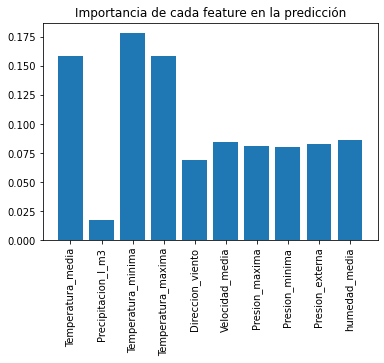

In [134]:

import numpy as np
import matplotlib.pyplot as pltb

plt.bar(list(df.iloc[:,[3,4,5,6,7,8,9,10,12, 13]].columns), classifier.feature_importances_)
plt.xticks( rotation=90)
plt.title('Importancia de cada feature en la predicción')
plt.show()

# Conexión a TBA

Estos son los datos metereologicos de AEMET, de TBA, que en features, son los mismos que GET

In [135]:
q = '''

    select * 
    from DATOS_METEREOLOGIA_HISTORICO_TBA 

    LIMIT 5
    
    
    
    
    '''
run_query(q)

,fecha,Estacion,Provincia,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Grados_debajo_siete,Presion_externa
0,2005-06-01,"VALÈNCIA, VIVEROS",VALENCIA,23,999,18.9,26.6,999,999.0,999.0,999.0,10.6,0.0,999.0
1,2005-06-02,"VALÈNCIA, VIVEROS",VALENCIA,22,0,17.6,27.3,999,999.0,999.0,999.0,8.0,0.0,999.0
2,2005-06-03,"VALÈNCIA, VIVEROS",VALENCIA,22,0,17.1,25.9,999,999.0,999.0,999.0,9.5,0.0,999.0
3,2005-06-04,"VALÈNCIA, VIVEROS",VALENCIA,23,0,19.8,25.6,999,999.0,999.0,999.0,9.4,0.0,999.0
4,2005-06-05,"VALÈNCIA, VIVEROS",VALENCIA,23,0,20.2,26.4,999,999.0,999.0,999.0,8.0,0.0,999.0


Y estos son los relativos a la sensorica. En bruto

In [136]:
q = '''

    select *
    
    
    from TBA_AGROSENSORS_HISTORIC_TRAINING

   
    
    
    LIMIT 5
    
    '''
run_query(q)

,id_nodo,HUMEDAD_1,HUMEDAD_2,HUMEDAD_3,HUMEDAD_4,HUMEDAD_5,HUMEDAD_6,COLUMNA_7,TEMPERATURA,HUMEDAD_RELATIVA,VELOCIDAD_VIENTO,LLUVIA,DIRECCION_VIENTO,HORA,FECHA
0,1,0,0,0,0,0,0,0,16.68,69.65,0.0,0.0,12,0 days 11:43:51,2021-12-23
1,1,0,0,0,0,0,0,0,17.36,67.05,0.0,0.0,15,0 days 11:53:10,2021-12-23
2,1,0,0,0,0,0,0,0,17.33,66.37,0.0,0.0,13,0 days 12:02:36,2021-12-23
3,1,0,0,0,0,0,0,0,17.29,66.69,0.0,0.0,12,0 days 12:13:31,2021-12-23
4,1,0,0,0,0,0,0,0,17.26,66.89,0.0,0.0,12,0 days 12:22:51,2021-12-23


In [137]:
q = '''

    select *
    
    
    from TBA_AGROSENSORS_HISTORIC_TRAINING

   
    
    
   
    
    '''
run_query(q)['FECHA'].value_counts()

2022-04-28    154
2022-01-26    154
2022-03-06    154
2022-02-27    154
2022-05-06    154
             ... 
2022-01-03     53
2021-12-27     48
2022-01-13     41
2021-12-23     41
2022-01-18      8
Name: FECHA, Length: 119, dtype: int64

 Los de la sensorica, los transofrmamos a diario porque vienen cada pocas horas, su frecuencia es  horaria.

De aquí nos interesa sobre todo la humedad. Sin embargo vamos a coger tambien la Temperatura media diaria.

In [138]:
q = '''

    select 
    FECHA, 
    AVG(HUMEDAD_RELATIVA) AS HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA, 
    AVG(TEMPERATURA) AS TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA
    
    from TBA_AGROSENSORS_HISTORIC_TRAINING

    GROUP BY (FECHA)
    
    
    LIMIT 5
    
    '''
run_query(q)

,FECHA,HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA,TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA
0,2021-12-23,66.704390,16.971707
1,2021-12-27,35.087292,26.858334
2,2022-01-03,63.975849,23.641321
3,2022-01-13,64.167073,26.519025
4,2022-01-18,87.847498,78.412502


Para teener un conjunto de datos de entrenamiento buenos, vamos a unir, los datos de AEMET con los datos de la Sensorica:

In [139]:
q = '''

    select * 
    from  DATOS_METEREOLOGIA_HISTORICO_TBA as A

    left join (

      select 
      FECHA, 
      AVG(HUMEDAD_RELATIVA) AS HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA, 
      AVG(TEMPERATURA) AS TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA
      
      from TBA_AGROSENSORS_HISTORIC_TRAINING

      GROUP BY (FECHA)



    ) as B

    on A.fecha = B.FECHA


    
    
    
    
    
    '''
data_raw_tba = run_query(q)

print('La cabecera: \n')

print(data_raw_tba.head(2))



La cabecera: 

        fecha           Estacion Provincia  Temperatura_media  \
0  2005-06-01  VALÈNCIA, VIVEROS  VALENCIA                 23   
1  2005-06-02  VALÈNCIA, VIVEROS  VALENCIA                 22   

   Precipitacion_l_m3  Temperatura_minima  Temperatura_maxima  \
0                 999                18.9                26.6   
1                   0                17.6                27.3   

  Direccion_viento  Velocidad_media  Presion_maxima  Presion_minima  \
0              999            999.0           999.0           999.0   
1              999            999.0           999.0           999.0   

   Prom_temperatura_media_prov  Grados_debajo_siete  Presion_externa FECHA  \
0                         10.6                  0.0            999.0   NaT   
1                          8.0                  0.0            999.0   NaT   

   HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA  \
0                                          NaN   
1                                          N

In [140]:


print('\n la cola: \n')

print(data_raw_tba.tail(2))


 la cola: 

           fecha           Estacion Provincia  Temperatura_media  \
6660  2022-04-29  VALÈNCIA, VIVEROS  VALENCIA                 17   
6661  2022-04-30  VALÈNCIA, VIVEROS  VALENCIA                 20   

      Precipitacion_l_m3  Temperatura_minima  Temperatura_maxima  \
6660                   0                11.4                22.1   
6661                   0                14.5                25.1   

     Direccion_viento  Velocidad_media  Presion_maxima  Presion_minima  \
6660               36              1.1           999.0           999.0   
6661               11              1.9           999.0           999.0   

      Prom_temperatura_media_prov  Grados_debajo_siete  Presion_externa  \
6660                         13.5                  0.0            999.0   
6661                         13.4                  0.0            999.0   

          FECHA  HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA  \
6660 2022-04-29                                    62.230461   


Tenemos datos de finales de 2021, y de 2022, pero no anteriores en cuanto a la TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA  Y HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA. Por lo que vamos a imputar la media. 

### Transformacion de datos de TBA

#### Fitrado de datos

Vemos que tipo de datos tenemos

In [141]:
data_raw_tba.describe()

,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Grados_debajo_siete,Presion_externa,HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA,TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA
count,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.0,6662.0,6662.000000,6662.000000,6662.0,101.000000,101.000000
mean,30.118283,11.411888,25.922801,34.317292,336.767292,999.0,999.0,14.954698,0.008451,999.0,70.009188,13.492828
std,104.924165,100.488342,105.389530,104.475988,471.049150,0.0,0.0,52.838246,0.115536,0.0,13.865663,7.539101
min,3.000000,0.000000,-0.600000,4.500000,0.000000,999.0,999.0,0.000000,0.000000,999.0,35.087292,7.082353
25%,14.000000,0.000000,9.900000,18.500000,1.400000,999.0,999.0,8.000000,0.000000,999.0,59.207124,10.385267
50%,19.000000,0.000000,14.400000,23.300000,2.200000,999.0,999.0,10.700000,0.000000,999.0,71.045454,12.093889
75%,24.000000,0.000000,19.800000,27.900000,999.000000,999.0,999.0,15.300000,0.000000,999.0,79.839569,14.515828
max,999.000000,999.000000,999.000000,999.000000,999.000000,999.0,999.0,999.000000,4.000000,999.0,94.042039,78.412502


Hay mucho oulier generado por nosotros, vamos a arreglarlos filtrando los datos

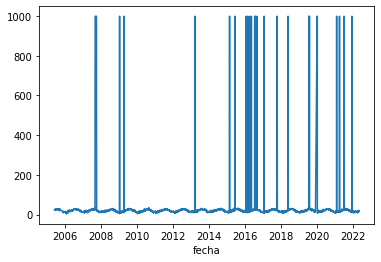

In [142]:
df_prueba = data_raw_tba.set_index('fecha')

df_prueba['Temperatura_media'].plot()

De todas las columnas numericas:

In [143]:
data_raw_tba.iloc[:,3:13].head()

,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Grados_debajo_siete
0,23,999,18.9,26.6,999,999.0,999.0,999.0,10.6,0.0
1,22,0,17.6,27.3,999,999.0,999.0,999.0,8.0,0.0
2,22,0,17.1,25.9,999,999.0,999.0,999.0,9.5,0.0
3,23,0,19.8,25.6,999,999.0,999.0,999.0,9.4,0.0
4,23,0,20.2,26.4,999,999.0,999.0,999.0,8.0,0.0


Vamos a indexarle su mediana a cada 999 de cada columna

In [144]:
data_raw_tba.dtypes

fecha                                                  object
Estacion                                               object
Provincia                                              object
Temperatura_media                                       int64
Precipitacion_l_m3                                      int64
Temperatura_minima                                    float64
Temperatura_maxima                                    float64
Direccion_viento                                       object
Velocidad_media                                       float64
Presion_maxima                                        float64
Presion_minima                                        float64
Prom_temperatura_media_prov                           float64
Grados_debajo_siete                                   float64
Presion_externa                                       float64
FECHA                                          datetime64[ns]
HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA           float64
TEMPERAT

Transformamos la dirección del viento tipo numerico

In [145]:
data_raw_tba.Direccion_viento = data_raw_tba.Direccion_viento.map(lambda x: int(x))

data_raw_tba.dtypes

fecha                                                  object
Estacion                                               object
Provincia                                              object
Temperatura_media                                       int64
Precipitacion_l_m3                                      int64
Temperatura_minima                                    float64
Temperatura_maxima                                    float64
Direccion_viento                                        int64
Velocidad_media                                       float64
Presion_maxima                                        float64
Presion_minima                                        float64
Prom_temperatura_media_prov                           float64
Grados_debajo_siete                                   float64
Presion_externa                                       float64
FECHA                                          datetime64[ns]
HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA           float64
TEMPERAT

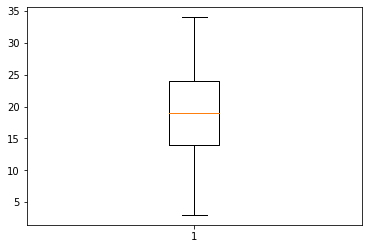

In [146]:
plt.boxplot(data_raw_tba[data_raw_tba['Temperatura_media'] < 998]['Temperatura_media'])
 
plt.show()

In [147]:

data = data_raw_tba[data_raw_tba['Temperatura_media'] < 998]
data.head()

,fecha,Estacion,Provincia,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Grados_debajo_siete,Presion_externa,FECHA,HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA,TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA
0,2005-06-01,"VALÈNCIA, VIVEROS",VALENCIA,23,999,18.9,26.6,999,999.0,999.0,999.0,10.6,0.0,999.0,NaT,NaN,NaN
1,2005-06-02,"VALÈNCIA, VIVEROS",VALENCIA,22,0,17.6,27.3,999,999.0,999.0,999.0,8.0,0.0,999.0,NaT,NaN,NaN
2,2005-06-03,"VALÈNCIA, VIVEROS",VALENCIA,22,0,17.1,25.9,999,999.0,999.0,999.0,9.5,0.0,999.0,NaT,NaN,NaN
3,2005-06-04,"VALÈNCIA, VIVEROS",VALENCIA,23,0,19.8,25.6,999,999.0,999.0,999.0,9.4,0.0,999.0,NaT,NaN,NaN
4,2005-06-05,"VALÈNCIA, VIVEROS",VALENCIA,23,0,20.2,26.4,999,999.0,999.0,999.0,8.0,0.0,999.0,NaT,NaN,NaN


In [148]:
print('La mediana de {}'.format('Temperatura_media'), ' es : ', np.median(data_raw_tba[data_raw_tba['Temperatura_media'] < 200]['Temperatura_media']))

La mediana de Temperatura_media  es :  19.0


In [149]:
for columna in list(data_raw_tba.iloc[:,3:14]): 

  print(columna)

Temperatura_media
Precipitacion_l_m3
Temperatura_minima
Temperatura_maxima
Direccion_viento
Velocidad_media
Presion_maxima
Presion_minima
Prom_temperatura_media_prov
Grados_debajo_siete
Presion_externa


In [150]:

import random


for columna in list(data_raw_tba.iloc[:,3:13]): 

  print('La mediana de {}'.format(columna), ' es : ')

  print(np.median(data_raw_tba[data_raw_tba[columna] < 200][columna]))

  #establecemos la mediana de la columna

  mediana_col = np.median(data_raw_tba[data_raw_tba[columna] < 200][columna])


  data_raw_tba[columna] = np.where(data_raw_tba[columna] > 900, mediana_col, data_raw_tba[columna])







  


  print('La {}'.format(columna), ' se ha filtrado correctamente, \n')

La mediana de Temperatura_media  es : 
19.0
La Temperatura_media  se ha filtrado correctamente, 

La mediana de Precipitacion_l_m3  es : 
0.0
La Precipitacion_l_m3  se ha filtrado correctamente, 

La mediana de Temperatura_minima  es : 
14.3
La Temperatura_minima  se ha filtrado correctamente, 

La mediana de Temperatura_maxima  es : 
23.2
La Temperatura_maxima  se ha filtrado correctamente, 

La mediana de Direccion_viento  es : 
12.0
La Direccion_viento  se ha filtrado correctamente, 

La mediana de Velocidad_media  es : 
1.7
La Velocidad_media  se ha filtrado correctamente, 

La mediana de Presion_maxima  es : 
nan
La Presion_maxima  se ha filtrado correctamente, 

La mediana de Presion_minima  es : 
nan
La Presion_minima  se ha filtrado correctamente, 

La mediana de Prom_temperatura_media_prov  es : 
10.7
La Prom_temperatura_media_prov  se ha filtrado correctamente, 

La mediana de Grados_debajo_siete  es : 
0.0
La Grados_debajo_siete  se ha filtrado correctamente, 



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Sin que se os olvide tambien vamos a tener que imputarles la mediana ade la humeda a a los datos de 'HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA' y 'TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA', pues en el rango considerado vamos a tener muchos NANs

In [151]:
data_raw_tba.columns[-2:]

Index(['HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA', 'TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA'], dtype='object')

In [152]:



for columna in list(data_raw_tba.columns[-2:]): 

  print('La mediana de {}'.format(columna), ' es : ')

  print(np.median(data_raw_tba[data_raw_tba[columna] < 200][columna]))

  #establecemos la mediana de la columna

  mediana_col = np.median(data_raw_tba[data_raw_tba[columna] < 200][columna])


  data_raw_tba[columna] = np.where(data_raw_tba[columna].isna(), mediana_col, data_raw_tba[columna])







  


  print('La {}'.format(columna), ' se ha filtrado correctamente, \n')

La mediana de HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA  es : 
71.04545447114226
La HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA  se ha filtrado correctamente, 

La mediana de TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA  es : 
12.093888902001911
La TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA  se ha filtrado correctamente, 



In [153]:
data_raw_tba.describe()

,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Grados_debajo_siete,Presion_externa,HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA,TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA
count,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,6662.000000,0.0,0.0,6662.000000,6662.000000,6662.0,6662.000000,6662.000000
mean,18.791354,1.214950,14.541549,23.038907,17.732062,1.739162,NaN,NaN,12.136070,0.008451,999.0,71.029744,12.115098
std,5.533075,6.197667,5.762229,5.631927,18.043696,0.728269,NaN,NaN,4.674883,0.115536,0.0,1.703625,0.939426
min,3.000000,0.000000,-0.600000,4.500000,1.000000,0.000000,NaN,NaN,0.000000,0.000000,999.0,35.087292,7.082353
25%,14.000000,0.000000,9.900000,18.500000,11.000000,1.400000,NaN,NaN,8.000000,0.000000,999.0,71.045454,12.093889
50%,19.000000,0.000000,14.300000,23.200000,12.000000,1.700000,NaN,NaN,10.700000,0.000000,999.0,71.045454,12.093889
75%,24.000000,0.000000,19.600000,27.700000,22.000000,1.900000,NaN,NaN,15.300000,0.000000,999.0,71.045454,12.093889
max,34.000000,157.000000,26.700000,43.000000,99.000000,7.500000,NaN,NaN,31.200000,4.000000,999.0,94.042039,78.412502


Los datos ya están listos para usarse

#### Comparación temperatura sensorica temperatura aemet

Vamos a comparar las temepraturas 'Temperatura_media' y 'TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA' para ver cual es la fluctuacio y cual usar

In [154]:
data_prueba = data_raw_tba[['fecha', 'Temperatura_media', 'TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA']]
data_prueba.head()

,fecha,Temperatura_media,TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA
0,2005-06-01,23.0,12.093889
1,2005-06-02,22.0,12.093889
2,2005-06-03,22.0,12.093889
3,2005-06-04,23.0,12.093889
4,2005-06-05,23.0,12.093889


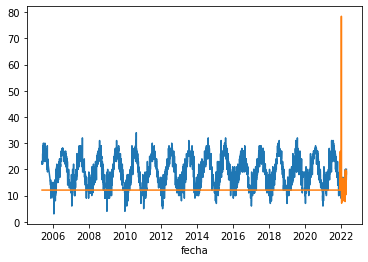

In [155]:
data_prueba = data_prueba.set_index('fecha')

data_prueba['Temperatura_media'].plot()
data_prueba['TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA'].plot()

Por lo que parece en la temperatura media diaria tmabien hay outliers... vamos a incluir un nuevo filtro, por debajo de la maxima de 'Temperatura_media'

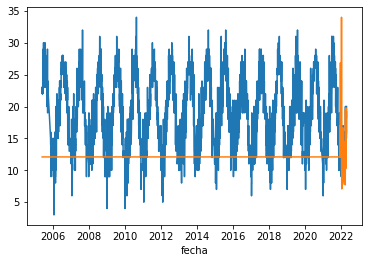

In [156]:
data_raw_tba.TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA = np.where(data_raw_tba.TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA > np.max(data_raw_tba.Temperatura_media),\
                                                               np.max(data_raw_tba.Temperatura_media),\
                                                               data_raw_tba.TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA)




data_prueba = data_raw_tba[['fecha', 'Temperatura_media', 'TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA']]




data_prueba = data_prueba.set_index('fecha')

data_prueba['Temperatura_media'].plot()
data_prueba['TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA'].plot()

**Usaremos la de AEMET, por seacaso, que temos más datos**

### Creación de variables intermedias

In [157]:
#Creación de una nueva columna para obtener el mes
data_raw_tba['mes'] = pd.DatetimeIndex(data_raw_tba['fecha']).month

### Establecimiento de reglas intermedias para el modelo



In [158]:
data_raw_tba.isna().sum()

fecha                                             0
Estacion                                          0
Provincia                                         0
Temperatura_media                                 0
Precipitacion_l_m3                                0
Temperatura_minima                                0
Temperatura_maxima                                0
Direccion_viento                                  0
Velocidad_media                                   0
Presion_maxima                                 6662
Presion_minima                                 6662
Prom_temperatura_media_prov                       0
Grados_debajo_siete                               0
Presion_externa                                   0
FECHA                                          6561
HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA       0
TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA            0
mes                                               0
dtype: int64

In [159]:

data_raw_tba['Presion_maxima'] = data_raw_tba['Presion_maxima'].fillna(0)
data_raw_tba['Presion_minima'] = data_raw_tba['Presion_minima'].fillna(0)
data_raw_tba.isna().sum()


fecha                                             0
Estacion                                          0
Provincia                                         0
Temperatura_media                                 0
Precipitacion_l_m3                                0
Temperatura_minima                                0
Temperatura_maxima                                0
Direccion_viento                                  0
Velocidad_media                                   0
Presion_maxima                                    0
Presion_minima                                    0
Prom_temperatura_media_prov                       0
Grados_debajo_siete                               0
Presion_externa                                   0
FECHA                                          6561
HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA       0
TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA            0
mes                                               0
dtype: int64

In [160]:
#Condiciones para ver la viabilidad del cultivo+
#cambiamos el nomrbe de la 'HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA' para poder hacer tood de una manera más uniforme
data_raw_tba = data_raw_tba.rename(columns = {'HUMEDAD_RELATIVA_MEDIA_DIARIA_SENSORICA_TBA':'humedad_media'})
data_raw_tba['cultivo'] = np.where(((data_raw_tba['mes']>=2) & (data_raw_tba['mes']<=6)) &
                         ((data_raw_tba['humedad_media']>=35) & data_raw_tba['humedad_media']<=60) & 
                         ((data_raw_tba['Temperatura_media']>7)),'si','no')




data_raw_tba.head()

,fecha,Estacion,Provincia,Temperatura_media,Precipitacion_l_m3,Temperatura_minima,Temperatura_maxima,Direccion_viento,Velocidad_media,Presion_maxima,Presion_minima,Prom_temperatura_media_prov,Grados_debajo_siete,Presion_externa,FECHA,humedad_media,TEMPERATURA_MEDIA_DIARIA_SENSORICA_TBA,mes,cultivo
0,2005-06-01,"VALÈNCIA, VIVEROS",VALENCIA,23.0,0.0,18.9,26.6,12.0,1.7,0.0,0.0,10.6,0.0,999.0,NaT,71.045454,12.093889,6,si
1,2005-06-02,"VALÈNCIA, VIVEROS",VALENCIA,22.0,0.0,17.6,27.3,12.0,1.7,0.0,0.0,8.0,0.0,999.0,NaT,71.045454,12.093889,6,si
2,2005-06-03,"VALÈNCIA, VIVEROS",VALENCIA,22.0,0.0,17.1,25.9,12.0,1.7,0.0,0.0,9.5,0.0,999.0,NaT,71.045454,12.093889,6,si
3,2005-06-04,"VALÈNCIA, VIVEROS",VALENCIA,23.0,0.0,19.8,25.6,12.0,1.7,0.0,0.0,9.4,0.0,999.0,NaT,71.045454,12.093889,6,si
4,2005-06-05,"VALÈNCIA, VIVEROS",VALENCIA,23.0,0.0,20.2,26.4,12.0,1.7,0.0,0.0,8.0,0.0,999.0,NaT,71.045454,12.093889,6,si


## Predicción

Falta: 

1. Entrenar el modelo con los datos de Valencia
2. Predecir:
- Hacer un test sobre los datos de valencia
- Dividir los datos de GET, y hacer la predicción sobre los datos de GET

3. Comparar resultado de accuracy:

- Renombrar el accuracy de KEVIN con 'accuracy_kevin', y el de TBA_GET, con 'accuracy_tba_get'

In [161]:
X_tb = data_raw_tba.iloc[:,[3,4,5,6,7,8,9,10,12, 13]].values



Y_tb = data_raw_tba.iloc[:,-1].values
Y_tb = Y_tb.reshape(-1,1)
Y_tb[:10]

array([['si'],
       ['si'],
       ['si'],
       ['si'],
       ['si'],
       ['si'],
       ['si'],
       ['si'],
       ['si'],
       ['si']], dtype=object)

In [162]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Y_tb[:,-1] = le.fit_transform(Y_tb[:,-1])

Y_tb = np.array(Y_tb,dtype=float)

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_tb = sc.fit_transform(X_tb)

In [164]:

from sklearn.model_selection import train_test_split
X_train_tb,X_test_tb, Y_train_tb,Y_test_tb = train_test_split(X_tb,Y_tb,test_size=0.2,random_state=0)


In [165]:
from sklearn.ensemble import RandomForestClassifier
classifier_tb = RandomForestClassifier(n_estimators=100,random_state=0)
classifier_tb.fit(X_train_tb,Y_train_tb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=0)

## Resultados

### Prediciendo sobre los datos de TBA

In [166]:

y_pred_tb = classifier_tb.predict(X_test_tb)

from sklearn.metrics import accuracy_score

accuracy_tba_sobre_tba = round(accuracy_score(Y_test_tb, y_pred_tb), 2)*100


print('El accuracy de predecir el cultivo de TBA con los datos de TBA es del: ', accuracy_tba_sobre_tba, ' %')


print('El cambio en el Accuracy de haber pasado de predecir el cultivo con datos TRAINING de GET sobre datos TEST GET a TRAINING de TBA con test de TBA es del: ', ((accuracy_tba_sobre_tba-accuracy_kevin)/accuracy_kevin)*100, '% ')

El accuracy de predecir el cultivo de TBA con los datos de TBA es del:  74.0  %
El cambio en el Accuracy de haber pasado de predecir el cultivo con datos TRAINING de GET sobre datos TEST GET a TRAINING de TBA con test de TBA es del:  -5.128205128205128 % 


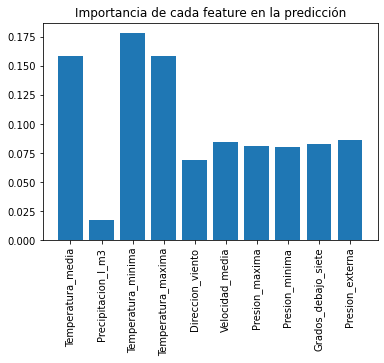

In [167]:

import numpy as np
import matplotlib.pyplot as pltb

plt.bar(list(data_raw_tba.iloc[:,[3,4,5,6,7,8,9,10,12, 13]].columns), classifier.feature_importances_)
plt.xticks( rotation=90)
plt.title('Importancia de cada feature en la predicción')
plt.show()

### Prediciendo sobre los datos de GET

In [168]:
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [169]:

#Ahora como daots de predicción vamos a usar los datos de GET como test, con 
#la inteligencia construida sobre TBA, y esto lo vamos a guardar en una variable
#de predicción diferente

y_pred_tb_get = classifier_tb.predict(X_test)

from sklearn.metrics import accuracy_score


#vamos a calcualr ahora la diferencia entre lo que podriamos predecir de GET con
#la inteligencia de TBA sobre los datos de TEST de GET


accuracy_tba_sobre_tba_get = round(accuracy_score(Y_test, y_pred_tb_get), 2)*100


print('El accuracy de predecir el cultivo de GET con los datos de TBA es del: ', accuracy_tba_sobre_tba_get, ' %')



print('El cambio en el Accuracy de haber pasado de predecir el cultivo con datos TRAINING de GET sobre datos TEST GET a TRAINING de TBA con TEST de GET es del: ', ((accuracy_tba_sobre_tba_get-accuracy_kevin)/accuracy_kevin)*100, '% ')



El accuracy de predecir el cultivo de GET con los datos de TBA es del:  63.0  %
El cambio en el Accuracy de haber pasado de predecir el cultivo con datos TRAINING de GET sobre datos TEST GET a TRAINING de TBA con TEST de GET es del:  -19.230769230769234 % 
